# 딥러닝 라이브러리


## Tensorflow (google) - 산업용
- 이미지 관련 라이브러리
- keras를 이용해 코딩이 쉬워짐
- 순차적, 함수적, 클래스 기반 코딩 모두 사용 가능


## Pytorch (meta) - 연구용
- 자연어 관련 라이브러리
- 허깅페이스, 랭체인
- 클래스 기반 코딩 -> 클래스 기반 코딩법이 익숙치 않다면 어려울 수 있음

### 인공신경망(ANN)

- 장점
    - 잡음에 강함 : 실제 데이터의 오류나 노이즈가 있어도 민감하게 반응하지 X
    - 비선형 문제 해결에 유용 : 선형(직선)으로 구분하기 어려운 패턴 학습 가능
    - 패턴 인식/분류/예측에 효과적 : 대량의 입력 데이터를 바탕으로 숨겨진 관계를 찾는데 용이
    - 스스로 가중치 조정(학습) : 입력 신호마다 가중치를 스스로 최적화하며 학습
- 단점
    - 학습에 오랜 시간 소요 : 층(layer)이 많아지고 노드 복잡해질수록 학습(연산) 시간이 급증
    - 지역 최적해 문제 : 초기 가중치 설정에 따라 전역 최적해가 아닌 지역 최적해에 머물러 학습 완료되는 문제
    - 가중치 신뢰도 낮음 : 수백만 개의 가중치 중 의미 있는 값의 가중치를 검증 어려움
    - 결과 해석이 쉽지 않음 : 해당 결과가 어떻게 나왔는지에 대한 설명 어려움
    - 구조(하이퍼파라미터) 결정 난이도 : 은닉층의 개수나 각 층의 노드 수를 정하는 것이 어려움
        - 실험과 튜닝에 시간이 필요
----

### 인공신경망 학습 과정

- 뉴런 : 사람의 뇌 구조 모방한 구조
    - 입력값 : 외부나 이전층으로부터 들어오는 데이터
    - 가중치와 편향 : 각 입력의 중요도 조절 및 결과값의 기준점 설정
    - 활성 함수 : 가중합에 비선형성을 부여 -> 최종 출력 결정
        - 선형적인 패턴만 존재하는 것이 아니기 때문에 데이터 구분에 더욱 용이
        - 시그모이드 함수(출력층 : 이진분류), 소프트맥스 함수(출력층 : 다중 클래스 분류), ReLU 함수(은닉층 : 훈련할 때 사용)


## 데이터 불러오기
- https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

### 전처리 수행

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv')
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]

In [7]:
data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C


In [8]:
data['Family'] = data["SibSp"] + data['Parch']

In [9]:
data.isna().sum() / len(data) * 100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Embarked     0.224467
Family       0.000000
dtype: float64

In [10]:
data.loc[:,'Age'] = data['Age'].fillna(data['Age'].mean())
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Family
0,0,3,male,22.000000,1,0,S,1
1,1,1,female,38.000000,1,0,C,1
2,1,3,female,26.000000,0,0,S,0
3,1,1,female,35.000000,1,0,S,1
4,0,3,male,35.000000,0,0,S,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,S,0
887,1,1,female,19.000000,0,0,S,0
888,0,3,female,29.699118,1,2,S,3
889,1,1,male,26.000000,0,0,C,0


In [11]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [12]:
data = data.drop(['SibSp', 'Parch'], axis=1)

In [13]:
data = pd.get_dummies(data, drop_first=True)

In [14]:
data

,Survived,Pclass,Age,Family,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000000,1,True,False,True
1,1,1,38.000000,1,False,False,False
2,1,3,26.000000,0,False,False,True
3,1,1,35.000000,1,False,False,True
4,0,3,35.000000,0,True,False,True
...,...,...,...,...,...,...,...
886,0,2,27.000000,0,True,False,True
887,1,1,19.000000,0,False,False,True
888,0,3,29.699118,3,False,False,True
889,1,1,26.000000,0,True,False,False


### 홀드아웃 수행

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# 딥러닝 시에도 데이터의 스케일을 맞추는 것이 좋음
- StandardScaler, MinMaxScaler를 주로 사용, 이상값이 많을 경우 RobustScaler를 사용
- 이진분류(0,1): MinMaxScaler
- 연속값예측: StandardScaler

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
mms = MinMaxScaler()
mms_X_train = mms.fit_transform(X_train)
mms_X_test = mms.transform(X_test)

mms_X_train = pd.DataFrame(mms_X_train, columns=X_train.columns, index=X_train.index)
mms_X_test = pd.DataFrame(mms_X_test, columns=X_test.columns, index=X_test.index)

In [20]:
display(mms_X_train)
display(mms_X_test)

,Pclass,Age,Family,Sex_male,Embarked_Q,Embarked_S
748,0.0,0.233476,0.1,1.0,0.0,1.0
45,1.0,0.367921,0.0,1.0,0.0,1.0
28,1.0,0.367921,0.0,0.0,1.0,0.0
633,0.0,0.367921,0.0,1.0,0.0,1.0
403,1.0,0.346569,0.1,1.0,0.0,1.0
...,...,...,...,...,...,...
476,0.5,0.421965,0.1,1.0,0.0,1.0
190,0.5,0.396833,0.0,0.0,0.0,1.0
736,1.0,0.597889,0.4,0.0,0.0,1.0
462,0.0,0.585323,0.0,1.0,0.0,1.0


,Pclass,Age,Family,Sex_male,Embarked_Q,Embarked_S
625,0.0,0.761247,0.0,1.0,0.0,1.0
566,1.0,0.233476,0.0,1.0,0.0,1.0
459,1.0,0.367921,0.0,1.0,1.0,0.0
804,1.0,0.334004,0.0,1.0,0.0,1.0
338,1.0,0.560191,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...
184,1.0,0.044986,0.2,0.0,0.0,1.0
607,0.0,0.334004,0.0,1.0,0.0,1.0
624,1.0,0.258608,0.0,1.0,0.0,1.0
103,1.0,0.409399,0.0,1.0,0.0,1.0


# Tensorflow Sequential API를 사용한 순차적 모델 생성 및 분석
- Sequential: 인공신경망을 순차적으로 작성할 때 사용
- Dense: 층, 레이어
--- 
1. 신경망 모델 정의
2. 신경망 모델 훈련
3. 훈련된 모델로 테스트
4. 검증

In [21]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2025-05-15 10:18:23.464896: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-15 10:18:24.626785: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747271905.131997     835 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747271905.256811     835 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747271906.193817     835 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

- 입력층은 반드시 독립변수 수를 정확히 지정
- 신경망 모델의 은닉층은 2~3개 정도로 한다
- Dense의 노드 수는 2의 배수로 지정 : 2 4 8 16 256
    - Dense의 노드는 큰 수에서 작은 수로 줄여나간다
- 은닉층의 활성화 함수 : Relu
- 출력층은 이진분류일 경우 : sigmoid, 다중분류일 경우 : softmax
- 회귀분석일 경우(종속변수가 연속형(수치형)인 경우) 활성화 함수 없이 노드를 1로 지정

In [22]:
# 신경망 모델 정의 kearas 3.0, tensorflow 2.19 기준

model = Sequential()
model.add(Input(shape=(mms_X_train.shape[1],))) # 입력층
model.add(Dense(64, activation='relu')) # 은닉층
model.add(Dense(32, activation='relu')) # 은닉층
model.add(Dense(16, activation='relu')) # 은닉층
model.add(Dense(1, activation='sigmoid')) # 출력층 : 이진분류(sigmoid)


I0000 00:00:1747272009.028757     835 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1347 MB memory:  -> device: 0, name: NVIDIA GeForce MX450, pci bus id: 0000:01:00.0, compute capability: 7.5


# model.compile() : 모델 파라미터 세팅
- loss : 오차 계산 지표
    - 이진분류 : binary_crossentropy
    - 다중분류 : categorical_crossentropy
    - 데이터의 0이 많은 희소행렬인 경우 : sparse_categorical_crossentropy
    - 연속형 데이터(회귀분석) : mse
- optimizer : learing_rate
    - adam을 가장 많이 사용
- metrics : 평가지표(Accuracy)

In [23]:
# 모델 파라미터 세팅
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

# model.fit(X_train, y_train) : 모델 훈련 
- epochs : 전체 데이터를 한 번 훈련하는 주기
- batch_size : 전체 데이터를 쪼개서 훈련, 데이터의 묶음, 메모리에 맞춰서 크기 조절(2의 배수)
    - 32, 64로 쪼개서 넣는 것 추천
- validation_data : 검증 데이터로 모델 검증 실시

In [24]:
history = model.fit(mms_X_train, y_train, epochs=100, batch_size=32, 
                    validation_data=(mms_X_test, y_test))

Epoch 1/100


I0000 00:00:1747272024.711786    1535 service.cc:152] XLA service 0x7f9a3801b1b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747272024.711956    1535 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce MX450, Compute Capability 7.5
2025-05-15 10:20:25.182704: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1747272027.654994    1535 cuda_dnn.cc:529] Loaded cuDNN version 90300


 3/20 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6910 - loss: 0.6445 

I0000 00:00:1747272032.358577    1535 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 585ms/step - accuracy: 0.6350 - loss: 0.6377 - val_accuracy: 0.6157 - val_loss: 0.5944
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6262 - loss: 0.5896 - val_accuracy: 0.7313 - val_loss: 0.5494
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8093 - loss: 0.5320 - val_accuracy: 0.7724 - val_loss: 0.5184
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.7740 - loss: 0.5348 - val_accuracy: 0.7724 - val_loss: 0.5026
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.7725 - loss: 0.5200 - val_accuracy: 0.7761 - val_loss: 0.4916
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - accuracy: 0.7908 - loss: 0.4765 - val_accuracy: 0.7761 - val_loss: 0.4793
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.7968 - loss: 0.4644 - val_accuracy: 0.7836 - val_loss: 0.4726
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.7897 - loss: 0.4863 - val_accuracy: 0.8060 - v

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8503 - loss: 0.3848 - val_accuracy: 0.8246 - val_loss: 0.4205
Epoch 52/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8310 - loss: 0.4010 - val_accuracy: 0.8134 - val_loss: 0.4217
Epoch 53/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8321 - loss: 0.3893 - val_accuracy: 0.8097 - val_loss: 0.4202
Epoch 54/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8401 - loss: 0.3809 - val_accuracy: 0.8134 - val_loss: 0.4183
Epoch 55/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8430 - loss: 0.3985 - val_accuracy: 0.8060 - val_loss: 0.4194
Epoch 56/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8495 - loss: 0.3788 - val_accuracy: 0.8097 - val_loss: 0.4201
Epoch 57/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8340 - loss: 0.4068 - val_accuracy: 0.8284 - val_loss: 0.4220
Epoch 58/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8264 - loss: 0.4057 - val_accuracy: 0.8134 

# 딥러닝 모델 성능 평가
- 딥러닝에서 모델의 성능을 평가하는 지표는 loss
    - 실행할 때마다 다른 결과를 나타낼 수 있음 -> 과정은 알 수 없음
- 보통 loss가 낮으면 accuracy가 올라가지만 비례하지 않는 경우도 존재
- Accuracy와 loss 간의 차이가 있을 때 loss가 낮은 모델이 우수한 모델

In [25]:
score = model.evaluate(mms_X_test, y_test)
print('test loss', score[0])
print('test accuracy', score[1])

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8029 - loss: 0.4400
test loss 0.4438563287258148
test accuracy 0.7873134613037109


In [26]:
# 모델의 결과가 딕셔너리 형태로 저장
for i in history.history:
    print(i)
#     print('val_accuracy :', i['val_accuracy'])

accuracy
loss
val_accuracy
val_loss


## history.history['loss'], history.history['val_loss'] : 훈련 결과 시각화
- 간격이 넓다는 것은 오버피팅 되었을 확률이 높다
- 간격이 좁은 곳에서 성능이 높다는 것을 알 수 있다

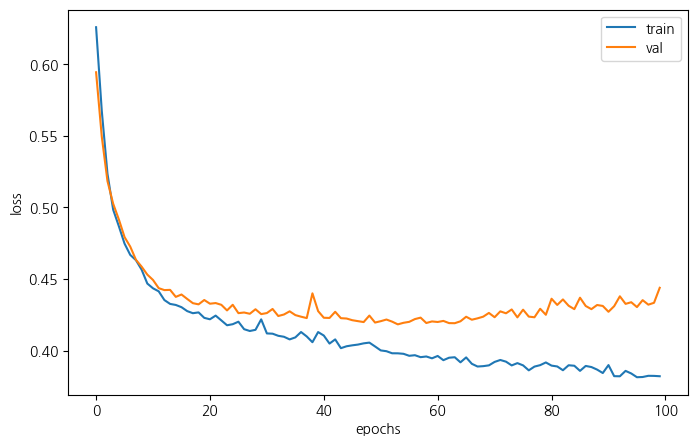

In [27]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 모델의 예측 값 출력

In [29]:
# 확률로 예측값이 나오게 됨 
pred = model.predict(mms_X_test)
# pred

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [30]:
result = pd.DataFrame(dict(y_test=y_test, pred=pred[:,0]))
result

,y_test,pred
625,0,0.333256
566,0,0.163280
459,0,0.137031
804,1,0.135668
338,1,0.085980
...,...,...
184,1,0.880921
607,1,0.374946
624,0,0.153933
103,0,0.119265


In [31]:
result['pred'] = result['pred'].apply(lambda x:1 if x >= 0.5 else 0)

In [32]:
result

,y_test,pred
625,0,0
566,0,0
459,0,0
804,1,0
338,1,0
...,...,...
184,1,1
607,1,0
624,0,0
103,0,0


##  모델 결과 확인

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(result['y_test'], result['pred']))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       165
           1       0.72      0.73      0.72       103

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



## DecisionTreeClassifier 모델 적용
- 딥러닝 모델보다 속도도 빠르고 성능 차이도 나지 않음
- 데이터셋의 종류와 갯수에 따라 머신러닝을 선정하는 것이 좋을 수 있음

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
# 최적의 성능을 내는 max_depth 확인
# for i in range(1,11):
#     print('='*30, f"max_depth = {i}", '='*30)
#     dtc = DecisionTreeClassifier(max_depth=i, random_state=42)
#     dtc.fit(mms_X_train, y_train)
#     pred2 = dtc.predict(mms_X_test)

#     print(classification_report(y_test, pred2))

In [36]:
# 최적의 성능을 내는 max_depth 3으로 확인

dtc = DecisionTreeClassifier(max_depth=3, random_state=42)
dtc.fit(mms_X_train, y_train)
pred2 = dtc.predict(mms_X_test)

print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       165
           1       0.78      0.69      0.73       103

    accuracy                           0.81       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.81      0.80       268



# Functional API를 활용한 함수형 모델
- Sequential API는 단순히 층을 여러 개 쌓는 형태라 복잡한 모델 생성에는 한계 존재
- Functional API는 입력층과 출력층을 사용자가 직접 정의 가능
- 다중 입력(Multi-input), 다중출력(Multi-output) 등 복잡한 모델을 정의할 수 있음
- Input(shape=(독립변수 수))로 입력층 정의 : 이전 층을 다음 층의 입력으로 사용
- model()에 입력과 출력 정의 가능

In [37]:
# Tensorflow 2.19 버전용
from keras.layers import Input, Dense
from keras.models import Model

In [38]:
# 입력층 
inputs = Input(shape=(mms_X_train.shape[1],))

# 은닉층
X1 = Dense(64, activation='relu')(inputs)
X2 = Dense(32, activation='relu')(X1)
X3 = Dense(16, activation='relu')(X2)

# 출력층
outputs = Dense(1, activation='sigmoid')(X3)

# 모델 정의
model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 375ms/step - accuracy: 0.5969 - loss: 0.6618 - val_accuracy: 0.6157 - val_loss: 0.6111
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.6306 - loss: 0.5972 - val_accuracy: 0.7425 - val_loss: 0.5668
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.7614 - loss: 0.5641 - val_accuracy: 0.7836 - val_loss: 0.5334
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.7674 - loss: 0.5430 - val_accuracy: 0.7687 - val_loss: 0.5097
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7884 - loss: 0.4961 - val_accuracy: 0.7761 - val_loss: 0.4952
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7804 - loss: 0.4851 - val_accuracy: 0.7761 - val_loss: 0.4842
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.7837 - loss: 0.4891 - val_accuracy: 0.8022 - val_loss: 0.4693
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.7910 - loss: 0.4778 - val_accuracy: 

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8353 - loss: 0.4102 - val_accuracy: 0.8321 - val_loss: 0.4259
Epoch 52/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8528 - loss: 0.3713 - val_accuracy: 0.8284 - val_loss: 0.4256
Epoch 53/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8218 - loss: 0.4146 - val_accuracy: 0.8172 - val_loss: 0.4270
Epoch 54/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8462 - loss: 0.3812 - val_accuracy: 0.7985 - val_loss: 0.4329
Epoch 55/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8537 - loss: 0.3850 - val_accuracy: 0.8284 - val_loss: 0.4257
Epoch 56/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8146 - loss: 0.4347 - val_accuracy: 0.8246 - val_loss: 0.4260
Epoch 57/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8411 - loss: 0.3860 - val_accuracy: 0.8060 - val_loss: 0.4282
Epoch 58/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8257 - loss: 0.4199 - val_accuracy: 0.8246 

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       165
           1       0.79      0.69      0.74       103

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268




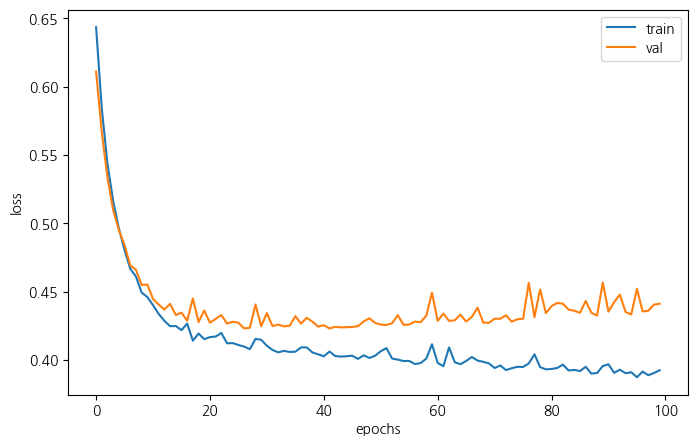

In [39]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(mms_X_train, y_train, epochs=100, batch_size=32, validation_data=(mms_X_test, y_test))

# test 데이터에 대한 예측 수행
pred = model.predict(mms_X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x: 1 if x >= 0.5 else 0)
print(classification_report(y_test, pred))
print()

# 실행 결과 확인
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# Class형 만들기 (Model Subclass API)
- class 형태의 모델 정의 방법
- keras의 Model을 상속받아 작성

In [40]:
class Titanic(Model):
    
    def __init__(self):
        super(Titanic, self).__init__()
        self.dense1 = Dense(128, activation='relu')
        self.dense2 = Dense(64, activation='relu')
        self.dense3 = Dense(32, activation='relu')
        self.dense4 = Dense(16, activation='relu')
        self.classifier = Dense(1, activation='sigmoid')
    
    def call(self, inputs):
        x1 = self.dense1(inputs)
        x2 = self.dense2(x1)
        x3 = self.dense3(x2)
        x4 = self.dense4(x3)
        return self.classifier(x4)


In [41]:
model = Titanic()
print(model.summary())

Model: "titanic"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 505ms/step - accuracy: 0.6161 - loss: 0.6508 - val_accuracy: 0.6157 - val_loss: 0.5901
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.6519 - loss: 0.5716 - val_accuracy: 0.8060 - val_loss: 0.5453
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7954 - loss: 0.5163 - val_accuracy: 0.7761 - val_loss: 0.5159
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7814 - loss: 0.5150 - val_accuracy: 0.7761 - val_loss: 0.4854
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8013 - loss: 0.4742 - val_accuracy: 0.7761 - val_loss: 0.4703
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8110 - loss: 0.4421 - val_accuracy: 0.7948 - val_loss: 0.4486
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.8274 - loss: 0.4341 - val_accuracy: 0.8209 - val_loss: 0.4448
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8062 - loss: 0.4375 - val_accuracy: 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8495 - loss: 0.3828 - val_accuracy: 0.8022 - val_loss: 0.4266
Epoch 52/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8379 - loss: 0.3942 - val_accuracy: 0.8097 - val_loss: 0.4316
Epoch 53/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8366 - loss: 0.3971 - val_accuracy: 0.7948 - val_loss: 0.4300
Epoch 54/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8347 - loss: 0.3800 - val_accuracy: 0.8172 - val_loss: 0.4322
Epoch 55/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8481 - loss: 0.3605 - val_accuracy: 0.8060 - val_loss: 0.4281
Epoch 56/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8269 - loss: 0.3905 - val_accuracy: 0.8209 - val_loss: 0.4254
Epoch 57/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8373 - loss: 0.3825 - val_accuracy: 0.8097 - val_loss: 0.4332
Epoch 58/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8035 - loss: 0.4275 - val_accuracy: 0.8097 

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       165
           1       0.78      0.67      0.72       103

    accuracy                           0.80       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.80      0.80      0.80       268




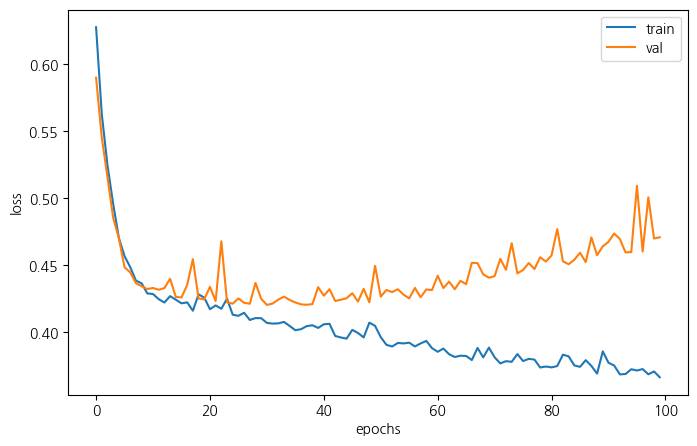

In [42]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(mms_X_train, y_train, epochs=100, batch_size=32, validation_data=(mms_X_test, y_test))

# test 데이터에 대한 예측 수행
pred = model.predict(mms_X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x: 1 if x >= 0.5 else 0)
print(classification_report(y_test, pred))
print()

# 실행 결과 확인
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()


In [88]:
val_accuracyprint(model.summary())

Model: "titanic"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,333 (138.02 KB)

 Trainable params: 11,777 (46.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,556 (92.02 KB)

None
